# Assignment 3 - Data Preprocessing

This assignment will be focused on data preprocessing methods that you've seen in class. We will be using the scikit-learn library. Some sample codes will be provided, but the goal is definitely for you to explore different functions and possibilities. Therefore, do not hesitate to go wild and stretch the capabilities of these libraries. 
In addition, we will be using the Random Forest Classifier. Do not worry if you do not know what this classifier is. It will be covered in the following classes!

*Don't forget that commenting your code is very important!*


### 1. Import packages 

###### Import the packages you think will be useful. We have imported some packages for you already, as they are outside the scope of this lecture. 

*Note*: we presented some example packages during class (eg. numpy, matplotlib, etc.). However, we only focus on the end results, so you can use any libraries of you choice. 

In [84]:
# IMPORT PACKAGES
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# =========== YOUR CODE HERE ======== 


### 2. Get started with the machine learning. 

For this assignment, we will be using the kickstarter dataset from <a>kaggle.com</a>. Kickstarter is famous online platform for entreneurs to advertise and raise money for their new startup projects. This dataset compiles the success, goal and other informations of the projects in 2018. 

We will try to use this dataset to predict the whether or not a project would succeed. We will be using the **'state'** column as out target labels. 

###### 1) Read the dataset './dataset/kickstarter.csv'. 

In [55]:
# =========== YOUR CODE HERE ======== 
ds=pd.read_csv('./dataset/kickstarter.csv')

In [56]:
ds.count()

ID                  378661
name                378657
category            378661
main_category       378661
currency            378661
deadline            378661
goal                378661
launched            378661
pledged             378661
state               378661
backers             378661
country             378661
usd pledged         374864
usd_pledged_real    378661
usd_goal_real       378661
dtype: int64

In [211]:
ds

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


###### 2) Describe the dataset. What do you see? 

### <span style="background-color: #F9F2EB"> Your dataset description here: 
- irrelevant: ID, name
- May be irrelevant: deadline/launch date. Either del or merge by doing span=deadline-launch
- Duplicated: goal/*usd_goal_real; pledged/*usd_pledged_real; *Category/*Main_category; Currency/*Country
- Problematic values: USD pledged/name. -->Drop
- Relevant numerical values: Goal, Pledged, Backers
- Relevant Categorical values: category or main category (need to try); Country
- Relevant ratio: pledged divided by goal. 
- Result: State: canceled(irrelevant)/*failed/*successful</span>
<p>* means more relevant</p>

###### 3) Create your train and test sets using a 0.8/0.2 split with the `train_test_split`  function from sciki-learn. 
Name your final datasets as `X_train`, `Y_train`, `X_test` and `Y_test`.

*Note: There are many ways of splitting data. A sample code for train-test splitting using *masks* is provided.*

In [52]:
# Random mask to split train / test sets. 
msk = np.random.rand(len(ds)) < 0.8 
train = ds[msk]
test = ds[~msk]

Y_train = train['state']
X_train = train.drop(columns='state')

Y_test = test['state']
X_test = test.drop(columns='state')

# Examine the size of the datasets to make sure that the split ratio was properly applied. (0.8/0.2)
print('Number of samples in train set: ', len(X_train))
print('Number of samples in train set: ', len(X_test))

Number of samples in train set:  302762
Number of samples in train set:  75899


In [58]:
# SCIKIT-LEARN TRAIN-TEST SPLIT
# =========== YOUR CODE HERE ======== 
X_unprocessed = ds.drop('state', 1)
Y_unprocessed = ds.state
X_train, X_test, Y_train, Y_test = train_test_split(
    X_unprocessed, Y_unprocessed, train_size=0.80, test_size=0.20, random_state=1)

In [22]:
print('Number of samples in train set: ', len(X_train))
print('Number of samples in train set: ', len(X_test))
print('Ratio: ',len(X_test)/len(X_train))

Number of samples in train set:  302928
Number of samples in train set:  75733
Ratio:  0.25000330111445623


###### 4) Fit the dataset onto the random forest classifer. 
Once again, do not worry about the what the classifier entails. We will cover this in more details in the following classes. 

In [29]:
randomForest = RandomForestClassifier()

# =========== YOUR CODE HERE ======== 
randomForest.fit(X_train, Y_train)
randomForest.score(X_test, Y_test)

c:\program files\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'The Songs of Adelaide & Abullah'

### UH OH!

As you may see, the dataset is not ready to be fit onto the algorithm just yet. There is some preprocessing to do before you can do anything with it. The machine does not quite understand the data yet. While you're at it, you can also play around to see how you can preprocess the data to enhance the model performance too!

Things that you can consider doing include, but not limited to: 
- Encode categorical data to machine intepretable 
- Normalize your data 
- Select / drop columns
- Take care of missing values 
- etc. 

###### 5) Preprocess your data the way you want, but make it work!

In [108]:
# =========== YOUR CODE HERE ======== 
#1 drop columns
ds_proc=ds.drop({'usd pledged'},1)

In [109]:
ds_proc=ds_proc.drop({'ID','name','category','currency','deadline','goal','launched','pledged'},1)

In [110]:
#change state to binary
ds_proc['state']=[1 if x=='successful' else 0 for x in ds_proc['state']]

In [111]:
#drop rows with nas
ds_proc.dropna(inplace=True)
print(ds.shape, ds_proc.shape)

(378661, 15) (378661, 6)


In [112]:
#merge pledged/goal
ds_proc['pledged/goal']=ds_proc['usd_pledged_real']/ds_proc['usd_goal_real']
ds_proc=ds_proc.drop({'usd_pledged_real','usd_goal_real'},1)

In [212]:
ds_proc

,main_category,state,backers,country,pledged/goal
0,Publishing,0,0,GB,0.000000
1,Film & Video,0,15,US,0.080700
2,Film & Video,0,3,US,0.004889
3,Music,0,1,US,0.000200
4,Film & Video,0,14,US,0.065795
5,Food,1,224,US,1.047500
6,Food,1,16,US,1.205000
7,Food,0,40,US,0.018120
8,Design,0,58,US,0.065864
9,Film & Video,0,43,US,0.096009


In [113]:
# Separate features from target var.

y = ds_proc.state
X = ds_proc.drop(['state'], 1)

In [114]:
X['country'].value_counts().sort_values(ascending=False)

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [115]:
X['main_category'].value_counts().sort_values(ascending=False)

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [116]:
X['country'] = ['US' if x == 'US' else 'Other' for x in X['country']]
#to dummy
todummy_list = ['main_category','country']

In [117]:
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [118]:
X = dummy_df(X, todummy_list)

In [119]:
y

0         0
1         0
2         0
3         0
4         0
5         1
6         1
7         0
8         0
9         0
10        0
11        1
12        0
13        0
14        1
15        0
16        0
17        0
18        1
19        0
20        1
21        0
22        0
23        0
24        1
25        1
26        0
27        1
28        1
29        1
         ..
378631    1
378632    0
378633    0
378634    0
378635    0
378636    1
378637    1
378638    0
378639    1
378640    0
378641    0
378642    1
378643    0
378644    1
378645    0
378646    1
378647    0
378648    0
378649    0
378650    0
378651    1
378652    1
378653    0
378654    0
378655    0
378656    0
378657    0
378658    0
378659    0
378660    0
Name: state, Length: 378661, dtype: int64

In [129]:
X.count()

backers                       378661
pledged/goal                  378661
main_category_Art             378661
main_category_Comics          378661
main_category_Crafts          378661
main_category_Dance           378661
main_category_Design          378661
main_category_Fashion         378661
main_category_Film & Video    378661
main_category_Food            378661
main_category_Games           378661
main_category_Journalism      378661
main_category_Music           378661
main_category_Photography     378661
main_category_Publishing      378661
main_category_Technology      378661
main_category_Theater         378661
country_Other                 378661
country_US                    378661
dtype: int64

In [130]:
pca = PCA(n_components=19)
X_pca = pd.DataFrame(pca.fit_transform(X))

###### 6) Refit your processed dataset onto the classifier. Test your model on your test set and print out the accuracy. 
If everything goes well, you should get an accuracy of around 0.85~0.88

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=0.80, test_size=0.20,random_state=1)

In [141]:
# =========== YOUR CODE HERE ======== 
randomForest = RandomForestClassifier()

# =========== YOUR CODE HERE ======== 
randomForest.fit(X_train, y_train)
acc1=randomForest.score(X_test, y_test)

c:\program files\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [142]:
acc1

0.9920510213513264

###### 7) What other preprocessing techniques can you use to improve performance? Refer for documentation here for other preprocessing techniques [https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing]

Successful optimization 1

In [156]:
#optimisation
# Separate features from target var.
y_opt = ds_proc.state
X_opt = ds_proc.drop(['state'], 1)
#Drop irrelevant columns
X_opt=X_opt.drop({'country','main_category'},1)

In [157]:
X_opt.head(10)

,backers,pledged/goal
0,0,0.000000
1,15,0.080700
2,3,0.004889
3,1,0.000200
4,14,0.065795
5,224,1.047500
6,16,1.205000
7,40,0.018120
8,58,0.065864
9,43,0.096009


In [168]:
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_opt, y_opt, train_size=0.80, test_size=0.20,random_state=1)

In [198]:
# =========== YOUR CODE HERE ======== 
randomForest = RandomForestClassifier()

# =========== YOUR CODE HERE ======== 
randomForest.fit(X_train_opt, y_train_opt)
acc2=randomForest.score(X_test_opt, y_test_opt)

c:\program files\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [199]:
acc2

0.9945730394940119

Improved by .2%

In [171]:
print('Processed accuracy %lf percent \n Optimized accuracy %lf percent' %(acc1*100,acc2*100))

Processed accuracy 99.205102 percent 
 Optimized accuracy 99.466547 percent


<span>Failed optimization: opt2</span>

In [175]:
#optimization 2
# =========== YOUR CODE HERE ======== 
#drop columns
ds_proc2=ds.drop({'usd pledged','ID','name','category','currency','deadline','goal','launched','pledged','main_category','backers','country'},1)


In [176]:
#change state to binary
ds_proc2['state']=[1 if x=='successful' else 0 for x in ds_proc2['state']]
#drop rows with nas
ds_proc2.dropna(inplace=True)
print(ds.shape, ds_proc.shape)

# Separate features from target var.

y_opt2 = ds_proc2.state
X_opt2 = ds_proc2.drop(['state'], 1)


(378661, 15) (378661, 5)


In [186]:
X_opt2['usd_pledged_real']=X_opt2['usd_pledged_real']/X_opt2['usd_goal_real']
X_opt2['usd_goal_real']=[1 for x in X_opt2['usd_goal_real']]

In [187]:
X_opt2

,usd_pledged_real,usd_goal_real
0,0.000000,1
1,0.080700,1
2,0.004889,1
3,0.000200,1
4,0.065795,1
5,1.047500,1
6,1.205000,1
7,0.018120,1
8,0.065864,1
9,0.096009,1


In [188]:
X_train_opt2, X_test_opt2, y_train_opt2, y_test_opt2 = train_test_split(X_opt2, y, train_size=0.80, test_size=0.20,random_state=1)

In [189]:
# =========== YOUR CODE HERE ======== 
randomForest = RandomForestClassifier()

# =========== YOUR CODE HERE ======== 
randomForest.fit(X_train_opt2, y_train_opt2)
acc3=randomForest.score(X_test_opt2, y_test_opt2)

c:\program files\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [190]:
acc3

0.9879973063261722

In [200]:
print('Processed accuracy %lf percent \nSuccessful opt1 accuracy %lf percent \nFailed opt2 accuracy %lf percent' %(acc1*100,acc2*100, acc3*100))

Processed accuracy 99.205102 percent 
Successful opt1 accuracy 99.457304 percent 
Failed opt2 accuracy 98.799731 percent


I can always use more n_estimators to improve my performance

In [203]:
# =========== YOUR CODE HERE ======== 
randomForest = RandomForestClassifier(100)

# =========== YOUR CODE HERE ======== 
randomForest.fit(X_train_opt, y_train_opt)
acc4=randomForest.score(X_test_opt, y_test_opt)

In [204]:
acc4

0.9951936408170811

In [206]:
print('Processed accuracy %lf percent \nSuccessful opt1 accuracy %lf percent (+.25 perc)\nFailed opt2 accuracy %lf percent (-.5 perc)\nUsing more estimators %lf percent (+.05 perc)' %(acc1*100,acc2*100, acc3*100,acc4*100))

Processed accuracy 99.205102 percent 
Successful opt1 accuracy 99.457304 percent (+.25 perc)
Failed opt2 accuracy 98.799731 percent (-.5 perc)
Using more estimators 99.519364 percent (+.05 perc)


Plot: learning curve

c:\program files\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


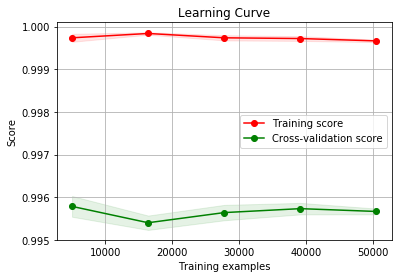

In [210]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.estimators.plot_learning_curve(randomForest, X_test_opt, y_test_opt)